# [HW10] Simple Linear Regression







## 1. Linear regression

Linear regression은 종속 변수 $y$와 한개 이상의 독립 변수 $X$와의 선형 관계를 모델링하는 방법론입니다. 여기서 독립 변수는 입력 값이나 원인을 나타내고, 종속 변수는 독립 변수에 의해 영향을 받는 변수입니다. 종속 변수는 보통 결과물을 나타냅니다. 

선형 관계를 모델링한다는 것은 1차로 이루어진 직선을 구하는 것입니다. 우리의 데이터를 가장 잘 설명하는 최적의 직선을 찾아냄으로써 독립 변수와 종속 변수 사이의 관계를 도출해 내는 과정입니다. 

이번 실습에서는 독립 변수가 1개인 simple linear regression을 진행하겠습니다. 변수가 하나인 직선을 정의하겠습니다. 
$$f(x_i) = wx_i + b$$




<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />


우리의 데이터를 가장 잘 설명하는 직선은 우리가 직선을 통해 예측한 값이 실제 데이터의 값과 가장 비슷해야 합니다. 우리의 모델이 예측한 값은 위에서 알 수 있듯 $f(x_i)$입니다. 그리고 실제 데이터는 $y$ 입니다.  

실제 데이터(위 그림에서 빨간 점) 과 직선 사이의 차이를 줄이는 것이 우리의 목적입니다. 그것을 바탕으로 cost function을 다음과 같이 정의해보겠습니다.

$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$


우리는 cost function을 최소로 하는 $w$와 $b$를 찾아야 합니다. 

우리의 cost function은 이차함수입니다. 우리는 고등학교 수학시간에 이차함수의 최솟값을 구하는 방법을 배웠습니다! 고등학교 때 배웠던 방법을 다시 한번 알아보고, 새로운 gradient descent 방법도 알아보겠습니다. 

### 1.1 Analytically

다음 식의 최솟값을 어떻게 찾을 수 있을까요? 
$$f(w) = w^2 + 3w -5$$

고등학교 때 배운 방법은 미분한 값이 0이 되는 지점을 찾는 것입니다. 

손으로 푸는 방법은 익숙하겠지만 sympy와 numpy 패키지를 사용하여 코드를 통해서 알아보도록 하겠습니다. 

In [1]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [2]:
w = sympy.Symbol('w', real=True)

f = w**2 + 3*w - 5
f

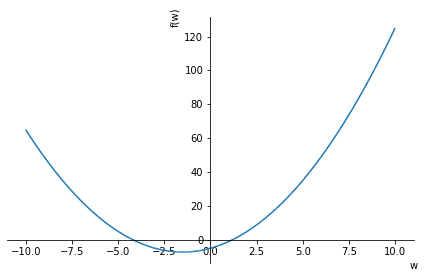

In [3]:
sympy.plotting.plot(f);

1차 미분한 식은 다음과 같이 알아볼 수 있습니다. 

In [4]:
fprime = f.diff(w)
fprime


그리고 해당 식의 해는 다음과 같이 구할 수 있습니다.

In [ ]:
sympy.solve(fprime, w)

### 1.2 Gradient Descent

두번째 방법은 오늘 배운 Gradient Descent 방법으로 한번에 정답에 접근하는 것이 아닌 반복적으로 정답에 가까워지는 방법입니다. 

이것도 코드를 통해서 이해해보도록 하겠습니다. 

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


먼저 기울기값을 구하는 함수를 먼저 만들겠습니다. 

In [5]:
fpnum = sympy.lambdify(w, fprime)
type(fpnum)

function

그 다음 처음 $w$ 값을 설정한 뒤, 반복적으로 최솟값을 향해서 접근해보겠습니다. 

In [7]:
w = 10.0   # starting guess for the min

for i in range(1000):
    w = w - fpnum(w)*0.01 # with 0.01 the step size

print(w)

-1.4999999806458753


이처럼 첫번째 방법과 두번째 방법에서 같은 값이 나온 것을 알 수 있습니다. 

Gradient descent 방법을 직접 데이터를 만들어서 적용해보겠습니다. 

### 1.3 Linear regression

실제로 linear 한 관계를 가진 데이터 셋을 사용하기 위해서 직접 데이터를 만들어보도록 하겠습니다. 

Numpy 패키지 안에 Normal distribution 함수를 통해서 조금의 noise 를 추가해서 생성하도록 하겠습니다. 

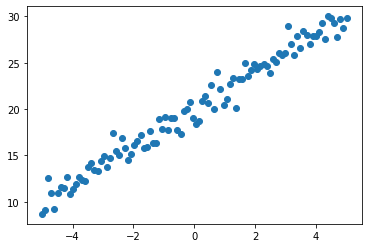

In [8]:
x_data = numpy.linspace(-5, 5, 100)
w_true = 2
b_true = 20

y_data = w_true*x_data + b_true + numpy.random.normal(size=len(x_data))

pyplot.scatter(x_data,y_data);

In [9]:
x_data.shape

In [10]:
y_data.shape

총 100개의 데이터를 생성하였습니다. 이제 코드를 통해 접근해보도록 하겠습니다. 




먼저 cost function을 나타내보겠습니다. 

In [11]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function     

위의 gradient descent 예시에서 한 것처럼 기울기 함수를 정의합니다. 

In [12]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

이제 $w$와 $b$의 초기값을 정의하고 gradient descent 방법을 적용하여 cost function을 최소로 하는 $w$와 $b$ 값을 찾아보겠습니다. 

In [13]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,x_data,y_data))/len(x_data)
    descent_w = numpy.sum(grad_w(w,b,x_data,y_data))/len(x_data)
    w = w - descent_w*0.01 # with 0.01 the step size
    b = b - descent_b*0.01 

print(w)
print(b)

2.0120771174610015
20.075468652747915


처음에 데이터를 생성할 때 정의한 $w, b$ 값과 매우 유사한 값을 구할 수 있었습니다. 

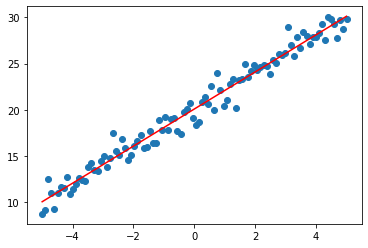

In [14]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w*x_data + b, '-r');

우리가 구한 직선이 데이터와 잘 맞는 것을 볼 수 있습니다. 이번에는 실제 데이터에서 linear regression을 진행해보겠습니다. 

## 2. Earth temperature over time 

오늘 배운 linear regression 방법을 사용해서 시간 흐름에 따른 지구의 온도 변화를 분석해보겠습니다. 

Global temperature anomaly라는 지표를 통해서 분석을 해볼 것입니다. 

여기서 temperature anomaly는 어떠한 기준 온도 값을 정해놓고 그것과의 차이를 나타낸 것입니다. 예를 들어서 temperature anomaly가 양수의 높은 값을 가진다면 그것은 평소보다 따듯한 기온을 가졌다는 말이고, 음수의 작은 값을 가진다면 그것은 평소보다 차가운 기온을 가졌다는 말입니다. 

세계 여러 지역의 온도가 각각 다 다르기 때문에 global temperature anomaly를 사용해서 분석을 하도록 하겠습니다. 자세한 내용은 아래 링크에서 확인하실 수 있습니다. 

https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php

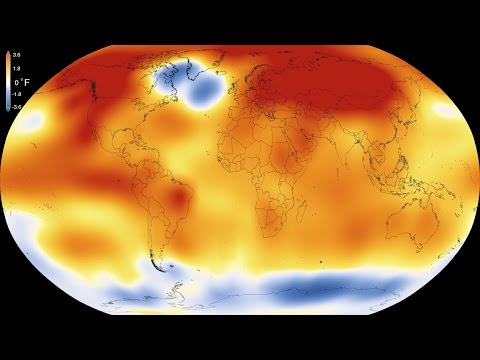

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

위 영상으로 기온이 점점 상승하고 있다는 것을 알 수 있습니다. 

이제부터는 실제 데이터를 가져와서 분석해보도록 하겠습니다. 


### Step 1 : Read a data file

NOAA(National Oceanic and Atmospheric Administration) 홈페이지에서 데이터를 가져오겠습니다. 

아래 명령어로 데이터를 다운받겠습니다. 

In [16]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7f0752de1590>)

다운로드한 데이터를 numpy 패키지를 이용해 불러오겠습니다. 

In [17]:
import numpy

In [18]:
fname = '/content/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

### Step 2 : Plot the data

Matplotlib 패키지의 pyplot을 이용해서 2D plot을 찍어보도록 하겠습니다. 

In [19]:
from matplotlib import pyplot
%matplotlib inline

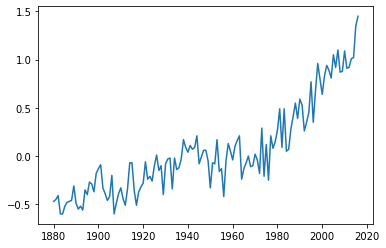

In [20]:
pyplot.plot(year, temp_anomaly);

Plot 에 여러 정보를 추가해서 더 보기 좋게 출력해보겠습니다. 

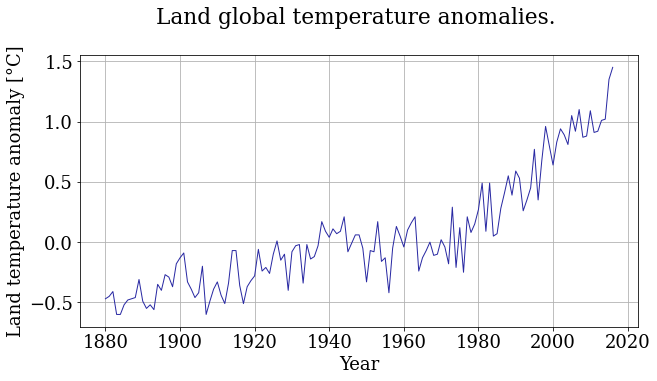

In [27]:
pyplot.rc('font', family='serif', size='18')

#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

### Step 3 : Analytically

Linear regression을 하기 위해서 먼저 직선을 정의하겠습니다. 
$$f(x_i) = wx + b$$

그 다음 수업 시간에 배운 cost function을 정의하도록 하겠습니다. 우리가 최소화 해야 할 cost function은 다음과 같습니다. 

$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$

이제 cost function 을 구하고자 하는 변수로 미분한 뒤 0이 되도록 하는 값을 찾으면 됩니다. 

먼저 $b$에 대해서 미분을 하겠습니다. 

$$\frac{\partial{J(w,b)}}{\partial{b}} = \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b)) = \frac{2}{n}\left(b + w\sum_{i=1}^n x_i -\sum_{i=1}^n y_i\right) = 0$$
위 식을 만족하는 $b$에 대해서 정리하면 

$$b = \bar{y} - w\bar{x}$$
여기서  $\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$ , $\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$ 입니다. 

이제 $w$에 대해서 미분을 하겠습니다. 

$$\frac{\partial{J(w,b)}}{\partial{w}} =  \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b))x_i = \frac{2}{n}\left(b\sum_{i=1}^nx_i + w\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_iy_i\right)$$ 

여기에 아까 구한 $b$를 대입한 후 0이 되는 $w$값을 구하하면

$$w = \frac{\sum_{i=1}^ny_i(x_i-\bar{x_i})}{\sum_{i=1}^nx_i(x_i-\bar{x_i})}$$

가 됩니다. 

우리는 계산을 통해서 $w$와 $b$ 값을 구했습니다. 

이제 코드를 통해서 적용해보도록 하겠습니다. 

In [28]:
w = numpy.sum(temp_anomaly*(year - year.mean())) / numpy.sum(year*(year - year.mean())) 
b = a_0 = temp_anomaly.mean() - w*year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


이제 그래프로 그려서 확인해보도록 하겠습니다. 

In [29]:
reg = b + w * year

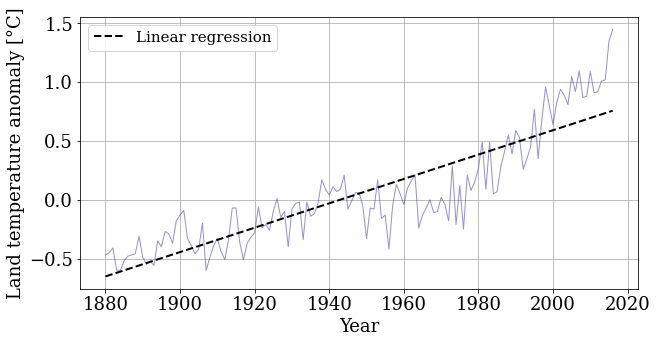

In [30]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

오늘은 linear regression을 직접 만든 데이터와 실제로 있는 데이터로 진행해보았습니다. 

년도에 따른 기온의 변화를 gradient descent 로 하는 방법은 내일 실습에서 추가로 알아보도록 하겠습니다. 

질문 있으면 편하게 해주세요~~